<a href="https://colab.research.google.com/github/light5551/lab_voice/blob/master/Petrova_lb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download wave file

In [5]:
!wget https://github.com/R6500/Python-bits/raw/master/Colaboratory/Sounds/Bicycle%20bell%203.wav
path_to_wave = "/content/Bicycle bell 3.wav"

--2021-10-09 21:17:57--  https://github.com/R6500/Python-bits/raw/master/Colaboratory/Sounds/Bicycle%20bell%203.wav
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/R6500/Python-bits/master/Colaboratory/Sounds/Bicycle%20bell%203.wav [following]
--2021-10-09 21:17:58--  https://raw.githubusercontent.com/R6500/Python-bits/master/Colaboratory/Sounds/Bicycle%20bell%203.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1869076 (1.8M) [audio/wav]
Saving to: ‘Bicycle bell 3.wav’

Bicycle bell 3.wav  100%[===================>]   1.78M  --.-KB/s    in 0.05s   

2021-10-09 21:17:58 (37.6 MB/s) - ‘Bic

# Needed imports

In [3]:
# Needed imports
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


Sample rate: 48000 Hz
Total time: 19.4594375s


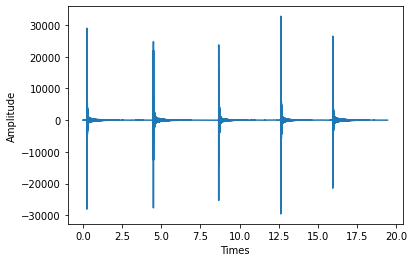

In [59]:
frame_rate, sound_data = wavfile.read(path_to_wave)
time                   = np.arange(0,len(sound_data))/frame_rate

# Show information about the object
print('Sample rate:',frame_rate,'Hz')
print(f'Total time: {len(sound_data)/frame_rate}s')


plt.plot(time, sound_data)
plt.ylabel('Amplitude')
plt.xlabel('Times')

plt.show()

# Launch raw version of sound

In [ ]:
Audio(sound_data,rate=frame_rate, autoplay=True)

## Test. Example: How to create a some sound

In [ ]:
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
Audio(data,rate=framerate)

# low freq


In [18]:
Fd = frame_rate # частота дискретизации
Fs = frame_rate / 100 # частота среза / TODO: не знаю как определить
m = 1 # порядок фильтра - описывает скорость затухания сигнала после частоты среза
wn = 2 * Fs/ Fd # 

In [19]:
# не знаю можно ли так делать
from scipy import signal

def filter_low_pass(FD, FS, m, data):
    wn = 2 * FS/ FD
    b, a = signal.butter(m, wn, 'lowpass')
    return signal.filtfilt(b, a, data)

filtedData = filter_low_pass(Fd, Fs, m, sound_data)

Audio(filtedData,rate=frame_rate)

# ЭХО

In [58]:
Nl = 8
DISTANCE = 10 # метров
time_to_wall = DISTANCE / 335 # СКОРОСТЬ ЗВУКА
D1 = frame_rate * time_to_wall

In [29]:
D = [D1 * 2 * (1 - i)/Nl for i in range(2, Nl)]
D

[-358.2089552238806,
 -716.4179104477612,
 -1074.6268656716418,
 -1432.8358208955224,
 -1791.044776119403,
 -2149.2537313432836]

# Distortion

In [76]:
TH = 10000 # ПОРОГ
MAX = 15000 # МАКСМАЛЬНОЕ ЗНАЧЕНИЕ


# АККУРАТНО - НЕ ВКЛЮЧАТЬ В НАУШНИКАХ

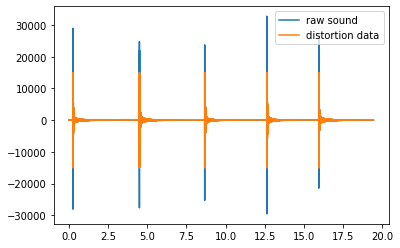

In [77]:
distortion_data = []
for i in sound_data:
  if abs(i) <= TH:
    value = i
  else:
    value = MAX * (-1 if i < 0 else 1)
  distortion_data.append(value)

fig, ax = plt.subplots()
ax.plot(time, sound_data, label = 'raw sound')
ax.plot(time, distortion_data, label = 'distortion data')
ax.legend()


plt.show()
Audio(np.array(distortion_data, dtype=np.int16),rate=frame_rate)